In [1]:
import numpy as np
import pandas as pd
import pybamm

import encapsulated_ltes as ltes

2024-08-31 12:38:51.288 - [WARNING] citations.read_citations(76): Citations could not be read because the 'pybtex' library is not installed. Install 'pybamm[cite]' to enable citation reading.


In [2]:
extensions = [
    "0.25L",
    "0.5L",
    "0.75L",
    "1L",
]

datasets = {}

for variable in ["HTF", "PCM"]:
    data = []
    for extension in extensions:
        filename = f"Nallusamy2007_{variable}_{extension}.csv"
        data.append(pd.read_csv(ltes.root_dir() / "data" / filename))
    datasets[variable] = data

In [3]:
models = [
    ltes.ReducedModel(),
    ltes.FullModel(),
]

param = ltes.get_parameter_values("Nallusamy2007")
param["Heat transfer coefficient [W.m-2.K-1]"] = 1000

simulations = []

for model in models:
    sim = pybamm.Simulation(model, parameter_values=param)
    solution = sim.solve(np.linspace(0, 10000, 1000))
    simulations.append(sim)
    print(f"{model.name}: {solution.solve_time}")

Reduced model: 332.187 ms
Full model: 40.288 s


In [4]:
solution.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=2.7777777777777777, step=0.02777777777777777…

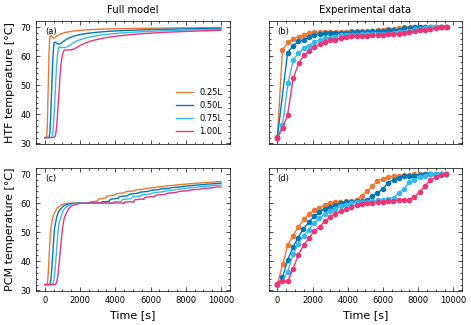

In [5]:
fig, _ = ltes.plot_comparison_data(simulations[1], datasets)

fig.savefig(ltes.root_dir() / "figures" / "validation_Nallusamy2007.png", dpi=300, bbox_inches="tight")

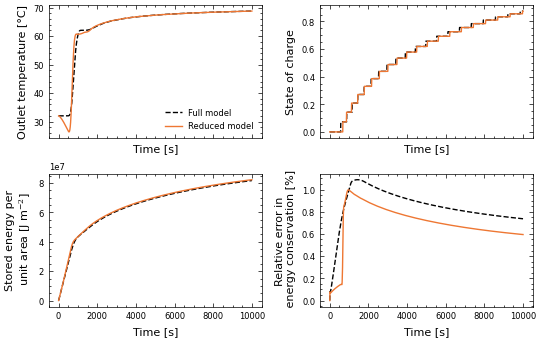

In [6]:
fig, _ = ltes.compare_0D_variables(simulations)

fig.savefig(ltes.root_dir() / "figures" / "compare_0D_variables.png", dpi=300, bbox_inches="tight")

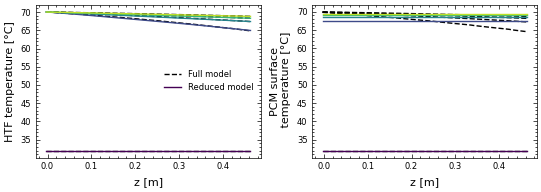

In [7]:
fig, _ = ltes.compare_1D_variables(simulations)

fig.savefig(ltes.root_dir() / "figures" / "compare_1D_variables.png", dpi=300, bbox_inches="tight")

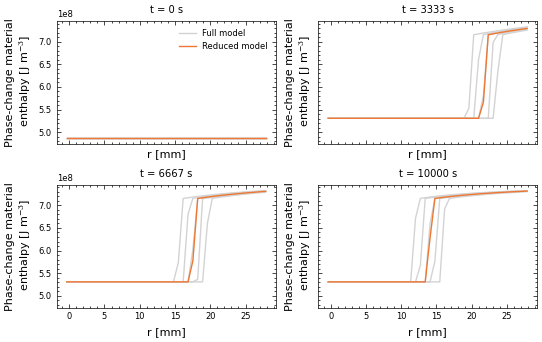

In [8]:
fig, _ = ltes.compare_2D_variables(simulations)

fig.savefig(ltes.root_dir() / "figures" / "compare_2D_variables.png", dpi=300, bbox_inches="tight")